In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras import layers
from keras.layers import Dense , Conv2D , MaxPooling2D , Flatten, BatchNormalization , Dropout
from keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:
data_dir = r"D:\Deep Learning\brain tumor"

In [3]:
train_path = r"D:\Deep Learning\brain tumor\Training"
test_path = r"D:\Deep Learning\brain tumor\Testing"

In [4]:
IMG_SIZE = (128, 128)
BATCH_SIZE = 32
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True
)
test_datagen = ImageDataGenerator(rescale=1./255)
train_gen = train_datagen.flow_from_directory(
    train_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)
test_gen = test_datagen.flow_from_directory(
    test_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)
class_names = list(train_gen.class_indices.keys())
print("Detected classes:", class_names)

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.
Detected classes: ['glioma', 'meningioma', 'notumor', 'pituitary']


In [5]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(4, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

C:\Users\Sujal Pal\Desktop\Sujal\Deep Learning\.venv\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,517,060 (24.86 MB)

 Trainable params: 6,517,060 (24.86 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(
    train_gen,
    validation_data=test_gen,
    epochs=30,
    callbacks=[early_stop]
)
model.save("brain_tumor_classifier.h5")

C:\Users\Sujal Pal\Desktop\Sujal\Deep Learning\.venv\.venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 52s 281ms/step - accuracy: 0.5283 - loss: 1.0386 - val_accuracy: 0.7513 - val_loss: 0.7089
Epoch 2/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 44s 247ms/step - accuracy: 0.7556 - loss: 0.6111 - val_accuracy: 0.5850 - val_loss: 1.1417
Epoch 3/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 44s 247ms/step - accuracy: 0.8008 - loss: 0.5219 - val_accuracy: 0.7262 - val_loss: 0.7590
Epoch 4/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 48s 266ms/step - accuracy: 0.8147 - loss: 0.4712 - val_accuracy: 0.7727 - val_loss: 0.5989
Epoch 5/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 47s 261ms/step - accuracy: 0.8384 - loss: 0.4226 - val_accuracy: 0.8024 - val_loss: 0.5208
Epoch 6/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 47s 264ms/step - accuracy: 0.8669 - loss: 0.3502 - val_accuracy: 0.8352 - val_loss: 0.4285
Epoch 7/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 47s 265ms/step - accuracy: 0.8857 - loss: 0.3216 - val_accuracy: 0.8383 - val_loss: 0.4327
Epoch 8/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 48s 267ms/step - accuracy: 0.8759 - loss: 0

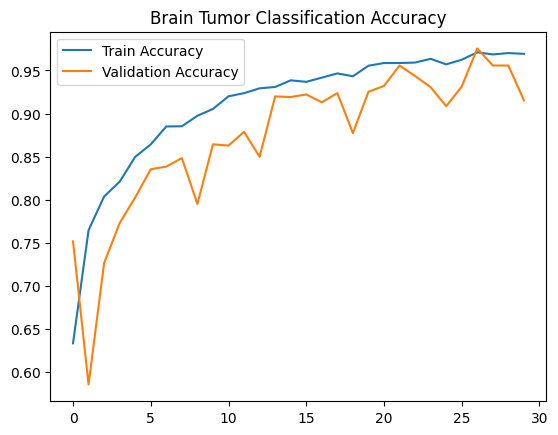

In [7]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Brain Tumor Classification Accuracy")
plt.show()


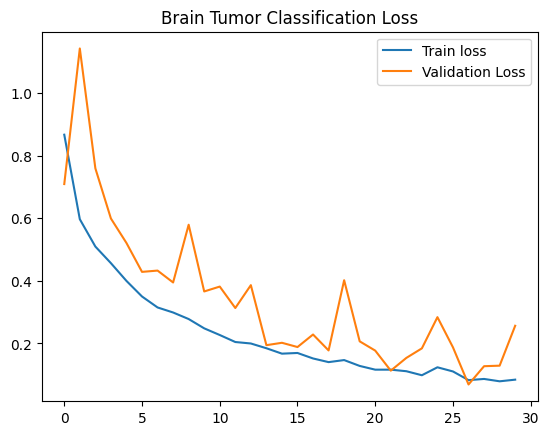

In [8]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Brain Tumor Classification Loss")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Predicted Class: notumor


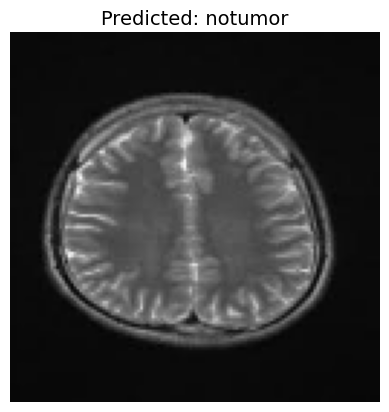

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img_path = r"D:\Deep Learning\brain tumor\download (3).jpg"
img = cv2.imread(img_path)
img_resized = cv2.resize(img, (128, 128))
img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)
img_norm = img_rgb / 255.0
img_array = np.expand_dims(img_norm, axis=0)

prediction = model.predict(img_array)
predicted_class = class_names[np.argmax(prediction)]
print("Predicted Class:", predicted_class)

plt.imshow(img_rgb)
plt.title(f"Predicted: {predicted_class}", fontsize=14)
plt.axis('off')
plt.show()